In [1]:
import copernicusmarine
copernicusmarine.__version__

'2.1.3'

In [2]:
import pandas as pd

In [7]:
dataset_insitu = "cmems_obs-ins_glo_phybgcwav_mynrt_na_irr"
# subset, save locally
response = copernicusmarine.subset(
      dataset_id=dataset_insitu,
      minimum_latitude=20,
      maximum_latitude=50,
      minimum_longitude=-85,
      maximum_longitude=-55,
      minimum_depth=0,
      maximum_depth=50,
      variables=["TEMP"],
      start_datetime="2022-07-01T00:00:00",
      end_datetime="2023-01-01T00:00:00",
      dataset_part="monthly"
)

INFO - 2025-07-09T15:11:53Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:

  ldrouineau


Copernicus Marine password:

  ········


INFO - 2025-07-09T15:12:02Z - Selected dataset version: "202311"
INFO - 2025-07-09T15:12:02Z - Selected dataset part: "monthly"


In [8]:
df = pd.read_csv(response.file_path)
df.head(10)

/tmp/ipykernel_260645/2603117416.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(response.file_path)


,variable,platform_id,platform_type,time,longitude,latitude,depth,pressure,is_depth_from_producer,value,value_qc,institution,doi,product_doi
0,TEMP,1301570,DB,2022-07-01T00:00:00Z,-58.7094,25.7280,1.0,NaN,1,27.02,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
1,TEMP,1301570,DB,2022-07-01T01:00:00Z,-58.7200,25.7198,1.0,NaN,1,26.98,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
2,TEMP,1301570,DB,2022-07-01T02:00:00Z,-58.7316,25.7122,1.0,NaN,1,26.95,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
3,TEMP,1301570,DB,2022-07-01T03:00:00Z,-58.7424,25.7046,1.0,NaN,1,26.90,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
4,TEMP,1301570,DB,2022-07-01T04:00:00Z,-58.7526,25.6960,1.0,NaN,1,26.89,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
5,TEMP,1301570,DB,2022-07-01T05:00:00Z,-58.7644,25.6862,1.0,NaN,1,26.87,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
6,TEMP,1301570,DB,2022-07-01T06:00:00Z,-58.7752,25.6758,1.0,NaN,1,26.84,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
7,TEMP,1301570,DB,2022-07-01T07:00:00Z,-58.7882,25.6666,1.0,NaN,1,26.83,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
8,TEMP,1301570,DB,2022-07-01T08:00:00Z,-58.8002,25.6570,1.0,NaN,1,26.81,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036
9,TEMP,1301570,DB,2022-07-01T09:00:00Z,-58.8134,25.6490,1.0,NaN,1,26.80,1,National Oceanic and Atmospheric Administratio...,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00036


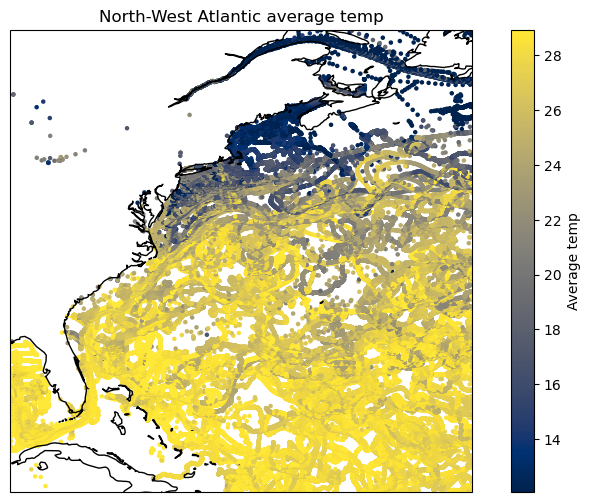

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colormaps

lat0=20
lat1=50
lon0=-85
lon1=-55

# Convert 'JULD' column to datetime type
# df['JULD'] = pd.to_datetime(df['JULD'])

# Group by 'LATITUDE' and 'LONGITUDE', and aggregate by averaging over 'PRES_ADJUSTED', 'JULD', and 'CHLA_ADJUSTED'
grouped = df.groupby(['latitude', 'longitude']).agg({
    'depth': 'mean',  # Take the mean depth
    'value': 'mean'  # Take the mean intensity
}).reset_index()

# Plotting using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Scatter plot
cbar_min = df['value'].quantile(q=0.1)
cbar_max = df['value'].quantile(q=0.9)
plt.scatter(
    grouped['longitude'], grouped['latitude'], 
    c=grouped['value'],
    vmin=cbar_min, vmax=cbar_max, cmap='cividis', s=5,
    transform=ccrs.PlateCarree()
)
plt.colorbar(label='Average ' + 'temp')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('North-West Atlantic average ' + 'temp')
plt.grid(True)
plt.xlim([lon0, lon1])
plt.ylim([lat0, lat1])
plt.show()

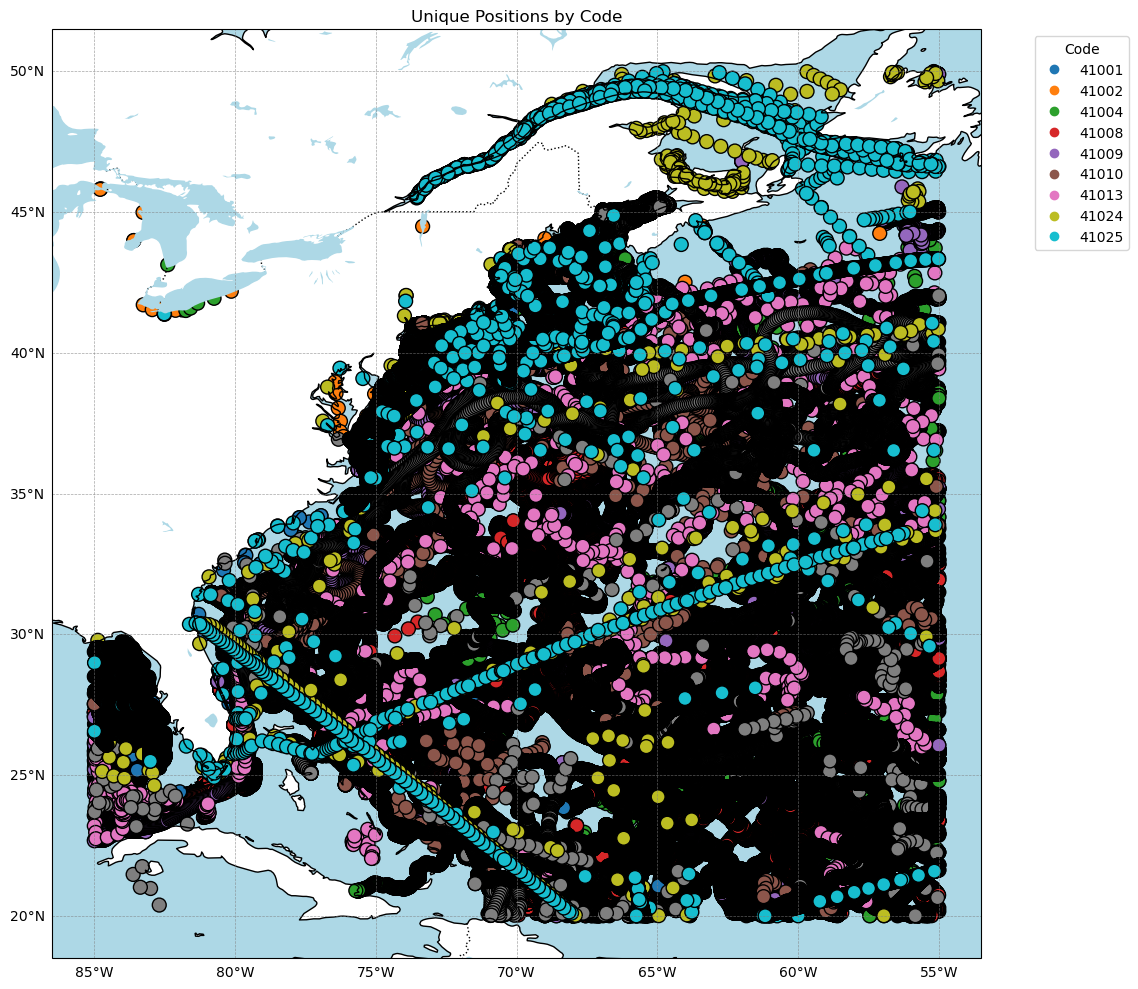

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

# Remove duplicates on 'code', 'latitude', 'longitude'
unique_locs = df.drop_duplicates(subset=['platform_id', 'latitude', 'longitude'])

# Plot with Cartopy
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
land_50m = NaturalEarthFeature('physical', 'land', '50m',
                               edgecolor='face',
                               facecolor='lightgray')

#ax.add_feature(land_50m)
#ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
#ax.add_feature(cfeature.RIVERS)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Scatter plot with color by 'code'
scatter = ax.scatter(
    unique_locs['longitude'],
    unique_locs['latitude'],
    c=unique_locs['platform_id'].astype('category').cat.codes,  # color by code
    cmap='tab10',  # use a categorical colormap
    s=100,
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Create legend with actual code names
handles, _ = scatter.legend_elements(prop="colors")
labels = unique_locs['platform_id'].astype('category').cat.categories
ax.legend(handles, labels, title="Code", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Unique Positions by Code")
plt.tight_layout()
plt.show()